MODEL BUILDING

We will be using following models to predict the crop yield in our project:
1. Decision Tree Regressor
2. Ridge Regression
3. Principal Component Analysis (PCA) + Random Forest Regressor
4. Feed Forward Neural Network

1. Decision Tree Regressor

Hyperparameter tunning using gridsearch

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best CV Score (MSE): 176052538.7951277

Model Performance:
Training MSE: 10592470.71
Testing MSE: 153558186.15
Training MAE: 930.59
Testing MAE: 3889.74
Training R²: 1.00
Testing R²: 0.98


C:\Users\zeelp\AppData\Local\Temp\ipykernel_16692\4171226443.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


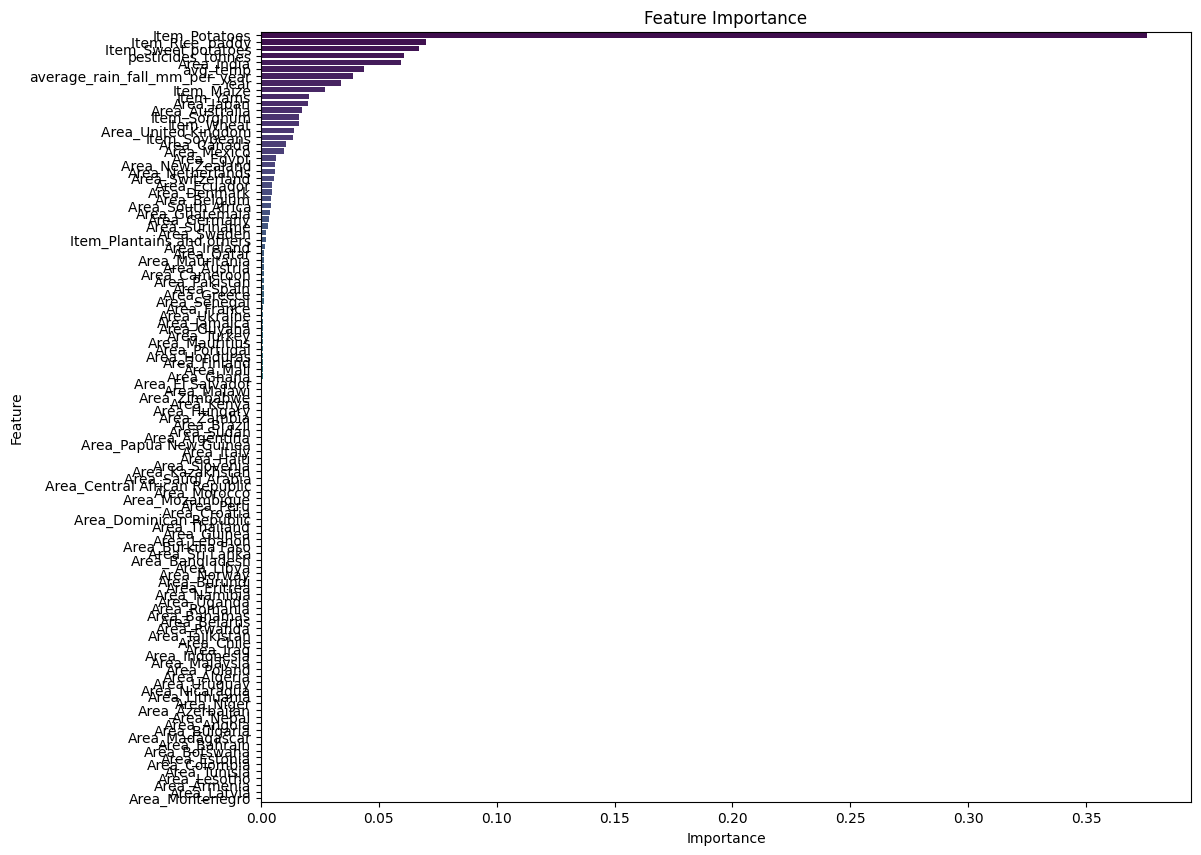

In [34]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("yield_df.csv")  # Replace with your dataset file path

# Preprocessing: One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_features = encoder.fit_transform(data[['Area', 'Item']])
categorical_columns = encoder.get_feature_names_out(['Area', 'Item'])

# Combine encoded features with numerical features
numerical_features = data[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
X = np.hstack((categorical_features, numerical_features))
y = data['hg/ha_yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)

# Use the best model to make predictions
best_dt_model = grid_search.best_estimator_
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")
print(f"Training R²: {train_r2:.2f}")
print(f"Testing R²: {test_r2:.2f}")

# Plot feature importance
feature_importance = best_dt_model.feature_importances_
feature_names = list(categorical_columns) + list(numerical_features.columns)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance")
plt.show()


2. Ridge Regressor 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Storing results
# Create a dictionary to store metrics
model_results = {
    "Model": [],
    "MSE": [],
    "MAE": [],
    "R²": [],
    "Accuracy": []
}

# One-hot encode 'Area' and 'Item' columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use 'sparse_output' instead of 'sparse'
categorical_features = encoder.fit_transform(data[['Area', 'Item']])
categorical_columns = encoder.get_feature_names_out(['Area', 'Item'])

# Combine encoded features with numerical features
numerical_features = data[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
X = np.hstack((categorical_features, numerical_features))
X_columns = list(categorical_columns) + numerical_features.columns.tolist()

# Target variable
y = data['hg/ha_yield']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)

# Make predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
accuracy = 100 * (1 - np.mean(np.abs((y_test - y_test_pred) / y_test)))

print("Training Metrics:")
print(f"  MSE: {train_mse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R-squared: {train_r2:.2f}")
    
print("Testing Metrics:")
print(f"  MSE: {test_mse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R-squared: {test_r2:.2f}")
print(f"  Accuracy: {accuracy:.2f}%")

# Example: Add metrics for Model 1 (e.g., Ridge Regression)
model_results["Model"].append("Ridge Regression")
model_results["MSE"].append(test_mse)  # Replace with your Ridge Regression test MSE
model_results["MAE"].append(test_mae)  # Replace with your Ridge Regression test MAE
model_results["R²"].append(test_r2)    # Replace with your Ridge Regression test R²
model_results["Accuracy"].append(accuracy)  # Replace with your Ridge Regression accuracy

# Optional: Display feature coefficients
coefficients = pd.DataFrame({'Feature': X_columns, 'Coefficient': ridge_model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))
results_df = pd.DataFrame(model_results)

Training Metrics:
  MSE: 1752110561.41
  MAE: 29197.25
  R-squared: 0.76
Testing Metrics:
  MSE: 1787925028.44
  MAE: 29629.21
  R-squared: 0.75
  Accuracy: 11.07%
                 Feature   Coefficient
96   Area_United Kingdom  12058.176785
102        Item_Potatoes  10859.971461
47            Area_Japan   9655.143617
4         Area_Australia   8672.939405
109                 Year   7653.979149
..                   ...           ...
103     Item_Rice, paddy -38979.030297
104         Item_Sorghum -43342.329983
100           Item_Maize -45257.239795
105        Item_Soybeans -48221.194195
107           Item_Wheat -49081.022245

[113 rows x 2 columns]


3. PCA+ RANDOM FOREST

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

model_results = {
    "Model": [],
    "MSE": [],
    "MAE": [],
    "R²": [],
    "Accuracy": []
}

# Load and preprocess the dataset
data = pd.read_csv("yield_df.csv")  # Replace with your dataset file path
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_features = encoder.fit_transform(data[['Area', 'Item']])
categorical_columns = encoder.get_feature_names_out(['Area', 'Item'])
numerical_features = data[['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
X = np.hstack((categorical_features, numerical_features))
y = data['hg/ha_yield']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train_pca)
y_test_pred = rf_model.predict(X_test_pca)

# Evaluate
print("Random Forest + PCA Metrics:")
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Testing MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Testing R²: {r2_score(y_test, y_test_pred):.2f}")
accuracy = 100 * (1 - np.mean(np.abs((y_test - y_test_pred) / y_test)))
print(f"  Accuracy: {accuracy:.2f}%")

model_results["Model"].append("PCA + RANDOM FOREST")
model_results["MSE"].append(test_mse)  # Replace with your Ridge Regression test MSE
model_results["MAE"].append(test_mae)  # Replace with your Ridge Regression test MAE
model_results["R²"].append(test_r2)    # Replace with your Ridge Regression test R²
model_results["Accuracy"].append(accuracy)  # Replace with your Ridge Regression accuracy
results_df = pd.DataFrame(model_results)

Random Forest + PCA Metrics:
Training MSE: 14906363.88
Testing MSE: 117455381.45
Testing R²: 0.98
  Accuracy: 90.49%


4. DEEP LEARNING Algorithm : Feed Forward Neural Network

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
y_test_pred = model.predict(X_test)

# Evaluate metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
accuracy = 100 * (1 - np.mean(np.abs((y_test - y_test_pred.flatten()) / y_test)))

# Print metrics
print("\nModel Evaluation Metrics:")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Testing MAE: {test_mae:.2f}")
print(f"Testing R²: {test_r2:.2f}")
print(f"Testing Accuracy: {accuracy:.2f}%")



Epoch 1/50


c:\Users\zeelp\OneDrive\Desktop\AI project\AI-Crop-yield-prediction\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


565/565 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13078978560.0000 - mae: 76640.0234 - val_loss: 10440666112.0000 - val_mae: 63190.0430
Epoch 2/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7968087040.0000 - mae: 53382.8555 - val_loss: 3674947840.0000 - val_mae: 37262.7148
Epoch 3/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2954251520.0000 - mae: 34574.1289 - val_loss: 2417337856.0000 - val_mae: 31466.6816
Epoch 4/50
565/565 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2134880640.0000 - mae: 29796.5586 - val_loss: 2010240128.0000 - val_mae: 28493.4805
Epoch 5/50
289/565 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1936733184.0000 - mae: 28065.4824

KeyboardInterrupt: 

Model comparision

In [46]:
results_df = pd.DataFrame(results)

NameError: name 'results' is not defined

In [45]:
# Plot the distributions
plt.figure(figsize=(12, 8))
sns.kdeplot(data=results_df, x="Actual", hue="Model", fill=False, linewidth=2, label="Actual")
sns.kdeplot(data=results_df, x="Predicted", hue="Model", fill=True, alpha=0.3, linewidth=1.5)
plt.title("Comparison of Actual vs Predicted Values")
plt.xlabel("Yield (hg/ha)")
plt.ylabel("Density")
plt.legend(title="Model")
plt.grid(True)
plt.show()

ValueError: Could not interpret value `Actual` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>

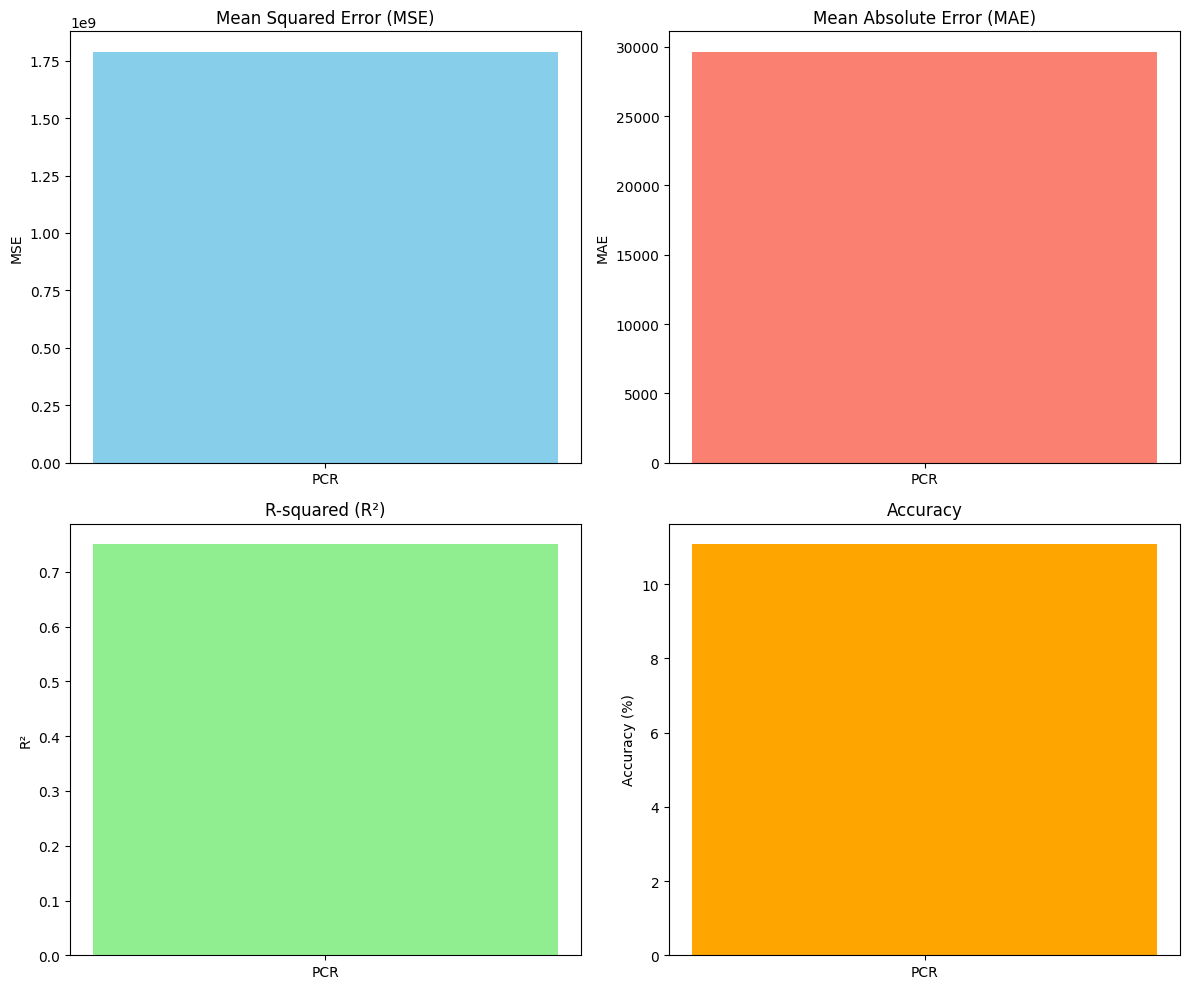

In [31]:
import matplotlib.pyplot as plt

# Set up the plot
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# MSE Comparison
ax[0, 0].bar(results_df["Model"], results_df["MSE"], color='skyblue')
ax[0, 0].set_title("Mean Squared Error (MSE)")
ax[0, 0].set_ylabel("MSE")

# MAE Comparison
ax[0, 1].bar(results_df["Model"], results_df["MAE"], color='salmon')
ax[0, 1].set_title("Mean Absolute Error (MAE)")
ax[0, 1].set_ylabel("MAE")

# R² Comparison
ax[1, 0].bar(results_df["Model"], results_df["R²"], color='lightgreen')
ax[1, 0].set_title("R-squared (R²)")
ax[1, 0].set_ylabel("R²")

# Accuracy Comparison
ax[1, 1].bar(results_df["Model"], results_df["Accuracy"], color='orange')
ax[1, 1].set_title("Accuracy")
ax[1, 1].set_ylabel("Accuracy (%)")

# Adjust layout
plt.tight_layout()
plt.show()
